# Project: Investigate a Dataset (TMDb Movies Dataset)

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitatioms</a></li>
</ul>

<a id='intro'></a>
# Introduction
This dataset contains data of 10k collected movies from (TMDb), including user ratings and revenue.

### Data overview
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

#### Variables 

- **id** 
- **imdb_id**
- **popularity** 
- **budget**
- **revenue** 
- **original_title** 
- **cast** 
- **homepage** 
- **director** 
- **tagline** 
- **overview** 
- **runtime** 
- **genres** 
- **production_companies** 
- **release_date** 
- **vote_count** 
- **vote_average** 	
- **release_year** 	
- **budget_adj** 
- **revenue_adj** 

### The main reseach questions:
>1- Is the ratings of movies get more better or worse?
>
>2- Is the film industry making profits along years?
>
>3- What is the relation between years and number of movies?
>
>4- Which genre has the highest number of movies ?

<a id='wrangling'></a>
# Data Wrangling


In [1]:
# Import statements for all of the packages we use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load your data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Print summary of TMDb file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

--there are missed values--

## Data Cleaning 
> - clean and drop some columns which we will not use
> - clear duplications
> - change **release_date** from string to datetime 
> - drop null and 0 values


In [4]:
# drop id,imdb_id,cast,homepage,tagline,keywords, and overview columns

to_drop = ["id","imdb_id","cast","homepage","tagline","keywords","overview"]
df.drop(to_drop, inplace=True, axis=1)

In [5]:
#check duplications
df.duplicated().sum()


1

--there is one duplicated row--

In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [7]:
# Convert [release_date] from string to datetime 
df["release_date"] = pd.to_datetime(df["release_date"])

In [8]:
# Replace the 0 values to NAN
df = df.replace(0, np.nan)

# drop all NAN values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3807 non-null   float64       
 1   budget                3807 non-null   float64       
 2   revenue               3807 non-null   float64       
 3   original_title        3807 non-null   object        
 4   director              3807 non-null   object        
 5   runtime               3807 non-null   float64       
 6   genres                3807 non-null   object        
 7   production_companies  3807 non-null   object        
 8   release_date          3807 non-null   datetime64[ns]
 9   vote_count            3807 non-null   int64         
 10  vote_average          3807 non-null   float64       
 11  release_year          3807 non-null   int64         
 12  budget_adj            3807 non-null   float64       
 13  revenue_adj      

--no needs to change datatypes-- 

<a id='eda'></a>
# Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned our data

## Research Question 1 
#### (Is the ratings of movies get more better or worse?)

> in this question we will work with the two columns [**release_year**, **vote_average**].
we will group the table by **release_year** then calculate the mean of **vote_average** for each year 

In [9]:
# calculate the mean for vote_average and group by release_year
avg_gb = df.groupby('release_year')['vote_average'].mean()

visualize the result to make conclusion.

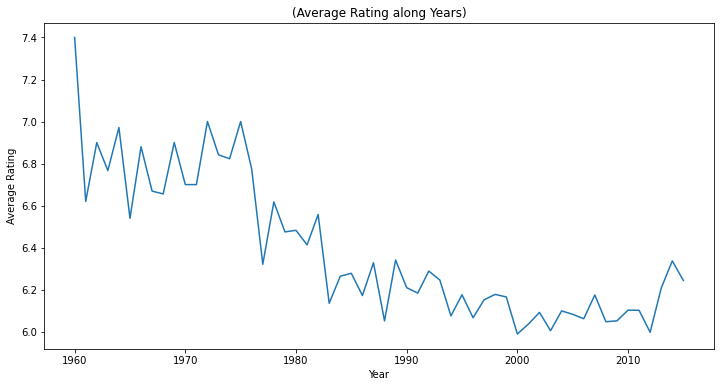

In [10]:
# plot the relationship 
avg_gb.plot(kind='line',title='(Average Rating along Years)',figsize = (12,6));

plt.xlabel('Year')
plt.ylabel('Average Rating');

### Conslusion

The ratings decrease along years.

The old movies had a better ratings than the new one.

## Research Question 2  
#### (Is the film industry making profits along years?)

> in this question we will work with the two columns [**release_year**, **profit**]. First, we will calculate the brofit = **budget - revenue** then insert to the **profit** column.

In [11]:
# Adding a brofit column from the substraction
df['profit'] = df["revenue"] - df["budget"]

df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


we have to group the table by **release_year** column and then calculate the mean for each year.


Then, visualize the result to make conclusions.

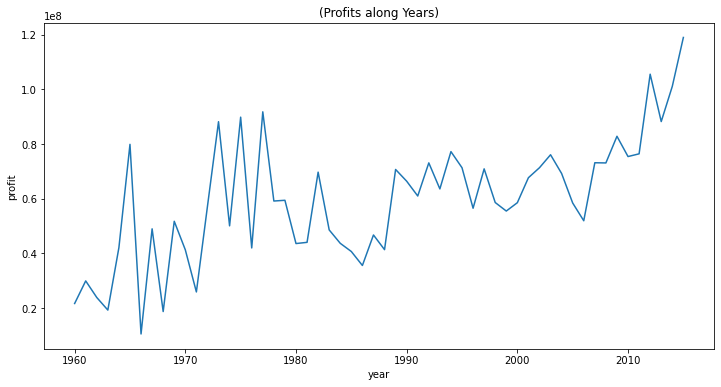

In [12]:
# groyp the profits by the release years
avg_profit = df.groupby('release_year')['profit'].mean()

# plot the relationship
avg_profit.plot(kind='line',title='(Profits along Years)',figsize = (12,6))
plt.ylabel('profit')
plt.xlabel('year');

### Conslusion

The profit increase along years. 

The film industry makes profit over time.

## Research Question 3 
#### (What is the relation between years and number of movies?)

> in this question we will work with the two variables [**release_year**, **number of movies**]. First,  calculate the number of movies in each year by th **release_year** column then sort the years.

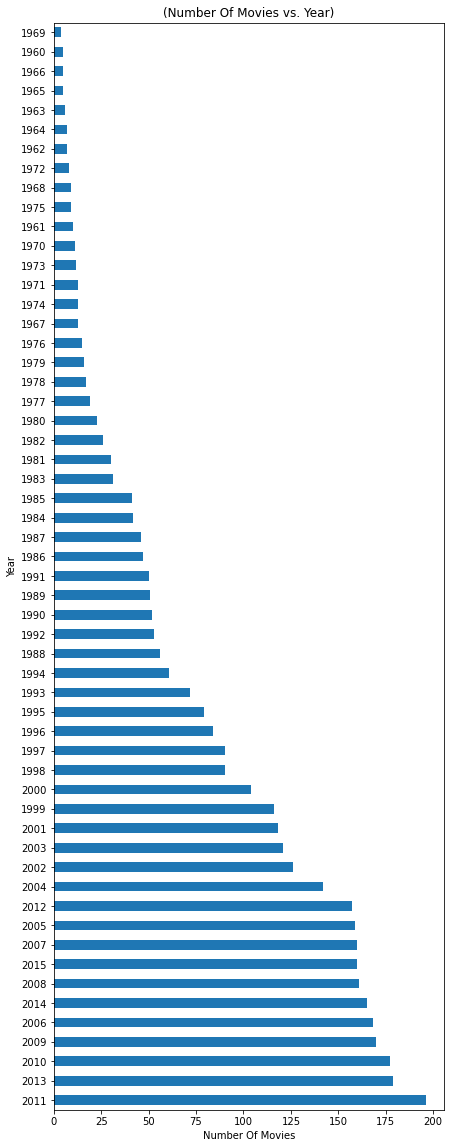

In [13]:
# plot the relationship 
df["release_year"].value_counts().plot(kind='barh',title='(Number Of Movies vs. Year)', figsize=(7,20));
plt.xlabel('Number Of Movies')
plt.ylabel('Year');

### Conclusion

Number of movies increase along years.

## Research Question 4
#### (Which genre has the highest number of movies ?)

> in this question we  will define a function to separate genres. Then, we will calculate the number of movies in each genre.


In [14]:
# separate the genres column 
df_gn = pd.Series(df.genres.str.cat(sep='|').split('|'))

#count the number of movies in each gener 
count_gn = df_gn.value_counts()
count_gn

Drama              1730
Comedy             1335
Thriller           1195
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               132
History             128
War                 119
Western              52
Documentary          28
Foreign               9
TV Movie              1
dtype: int64

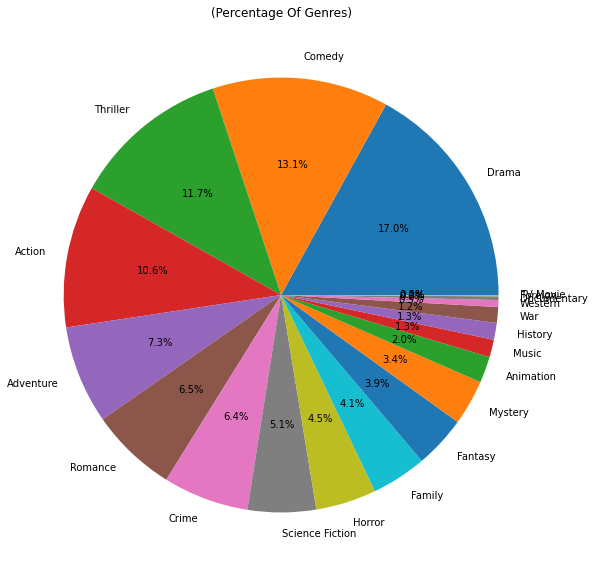

In [15]:
# Plot pie relationship
count_gn.plot(kind="pie",figsize=(10,10),autopct="%1.1f%%")

plt.title('(Percentage Of Genres)')
plt.ylabel('');

### Conclusion

The genre that have highest number of movies is **Drama: 17%**
then **comdey: 13.1%**

<a id='conclusions'></a>
# Conclusions

- The movies are getting worse along time.
- The film industry is a profit industry along time.
- the number of movies are increasing over years.
- The most frequent genre is Drama.



<a id='limitations'></a>
# Limitations

- We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. 
- Our analysis is limited to only the provided dataset.
- There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
- inccorect datatype.
- Duplicates in the data and will effect the results.